<a href="https://colab.research.google.com/github/MrAdithya21/Segmentation-Analysis-for-Customer-Insights/blob/main/Segmentation_Analysis_for_Customer_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project will analyze and segment customer data to derive actionable marketing strategies.


In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn plotly umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

# Upload and load the dataset
file_path = '/content/Sales Data Analysis.csv'
data = pd.read_csv(file_path)
data.head()

# Summary of the dataset
data.info()
data.describe()

# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Column1           185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product Category  185950 non-null  object 
 3   Product           185950 non-null  object 
 4   Quantity Ordered  185950 non-null  int64  
 5   Price Each        185950 non-null  float64
 6   Order Date        185950 non-null  object 
 7   Purchase Address  185950 non-null  object 
 8   Month             185950 non-null  int64  
 9   Sales             185950 non-null  float64
 10  City              185950 non-null  object 
 11  Hour              185950 non-null  int64  
 12  Time of Day       185950 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 18.4+ MB


,0
Column1,0
Order ID,0
Product Category,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0
Month,0
Sales,0


 **Data Preprocessing**

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Day'] = data['Order Date'].dt.day
data['Weekday'] = data['Order Date'].dt.day_name()

<ipython-input-4-a112de91473c>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Order Date'] = pd.to_datetime(data['Order Date'])


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding 'Product Category' and 'City'
label_encoder = LabelEncoder()
data['Product Category'] = label_encoder.fit_transform(data['Product Category'])
data['City'] = label_encoder.fit_transform(data['City'])

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Quantity Ordered', 'Price Each', 'Sales']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


### Why are we doing this?

Clustering algorithms require clean, consistent, and numerical data. Preprocessing prepares the dataset by:
1. **Converting Dates**: Extract new features like `Day` and `Weekday` from the `Order Date` column to add temporal dimensions.
2. **Encoding Categorical Variables**: Algorithms like K-Means work only with numerical data. Converting categorical data, such as `Product Category` and `City`, into numeric formats ensures compatibility.
3. **Normalizing Numerical Data**: Features like `Quantity Ordered`, `Price Each`, and `Sales` can vary significantly in scale. Normalizing ensures all features have equal weight in clustering.

---

**Exploratory Data Analysis (EDA)**

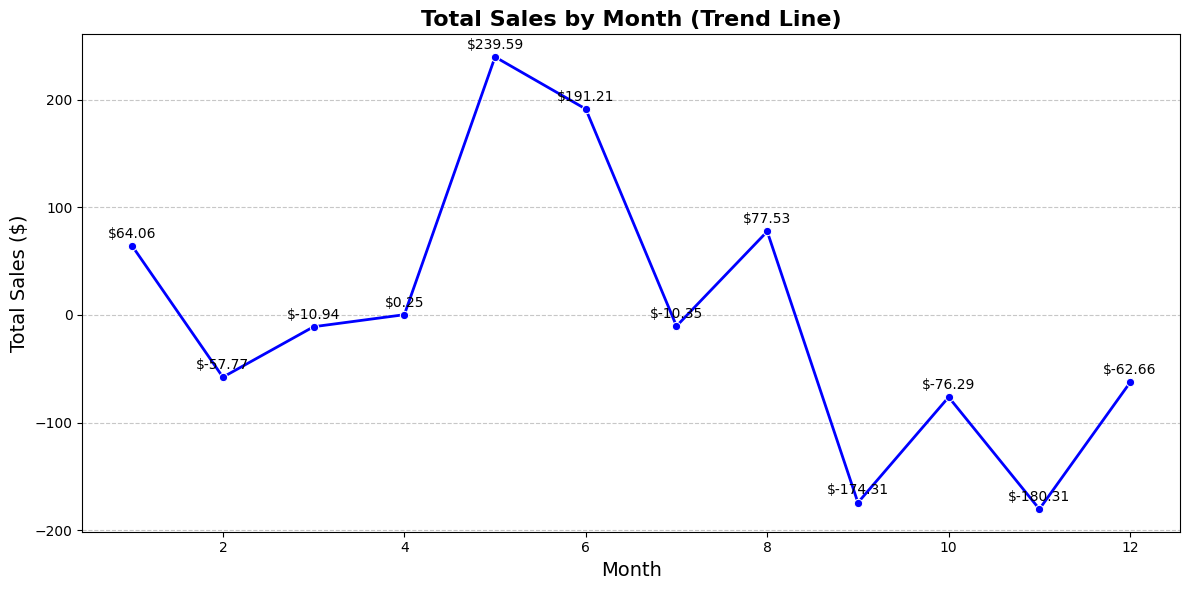

In [ ]:
# Create a line plot for better trend visualization
plt.figure(figsize=(12, 6))
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()
sns.lineplot(x='Month', y='Sales', data=monthly_sales, marker='o', linewidth=2, color='blue')

# Add gridlines and labels
plt.title('Total Sales by Month (Trend Line)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate data points on the line
for index, row in monthly_sales.iterrows():
    plt.text(row['Month'], row['Sales'] + max(monthly_sales['Sales']) * 0.02,
             f"${row['Sales']:.2f}", ha='center', va='bottom', fontsize=10, color='black')

# Show the improved line plot
plt.tight_layout()
plt.show()


## **Total Sales by Month (Trend Line)**

### **Description:**
This line graph visualizes the trend of total sales across all months. Each data point represents the aggregated sales value for a specific month, allowing us to observe fluctuations over time.

### **Key Insights:**
1. **Positive Peaks**:
   - The highest sales occurred in **May**, with total sales reaching \$239.59, indicating a significant seasonal trend during this period.
   - A secondary peak is observed in **August** with $77.53, suggesting another potential promotional or high-demand period.

2. **Negative Dips**:
   - Significant dips in sales can be seen in **September (-\$174.31)** and **November (-$180.31)**, highlighting possible off-peak periods or reduced customer activity.

3. **General Trend**:
   - The sales pattern shows notable volatility, with sharp increases and decreases between consecutive months.
   - This indicates potential external factors such as promotions, seasonal demand, or customer preferences influencing sales performance.

### **Why this graph is useful:**
- **Seasonality Analysis**: The graph helps identify peak and low-sales months, providing critical input for inventory planning and marketing strategies.
- **Trend Identification**: It highlights how sales fluctuate over the year, enabling better forecasting and resource allocation.
- **Actionable Insights**: Months with negative or lower sales can be targeted for promotional campaigns to boost revenue during off-peak times.


In [ ]:
# Calculate total revenue by product category
category_revenue = data.groupby('Product Category')['Order Value'].sum()

# Plot revenue share as a pie chart
plt.figure(figsize=(8, 8))
category_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Pastel1')
plt.title('Revenue Share by Product Category')
plt.ylabel('')  # Hide y-axis label for a cleaner look
plt.show()

KeyError: 'Column not found: Order Value'

# Top 10 Best-Selling Products Analysis

The horizontal bar chart titled **"Top 10 Best-Selling Products"** highlights the most popular products in terms of the quantity ordered. Below is an analysis of the trends observed:

1. **Top Products**:
   - **AAA Batteries (4-pack)** and **AA Batteries (4-pack)** are the most sold products, likely due to their necessity for common household and electronic devices.
   - **USB-C Charging Cable** and **Lightning Charging Cable** follow closely, indicating the high demand for smartphone accessories.

2. **Consumer Electronics**:
   - Products such as **Wired Headphones**, **Apple AirPods Headphones**, and **Bose SoundSport Headphones** rank prominently, reflecting the popularity of audio devices.
   - Monitors, including **27in FHD Monitor** and **27in 4K Gaming Monitor**, also contribute significantly, suggesting demand for tech and gaming setups.

3. **Insights**:
   - The top products are dominated by accessories and essentials like batteries and charging cables, showing consistent consumer reliance on these items.
   - Consumer electronics (headphones, monitors) also play a significant role, which may indicate higher-value items driving revenue.

4. **Recommendations**:
   - Inventory for the top-selling products should be carefully managed to meet demand and avoid stockouts.
   - Consider bundling related products (e.g., charging cables with batteries) to drive higher sales per transaction.
   - Focus promotional efforts on high-demand items during peak sales periods, such as holiday seasons.



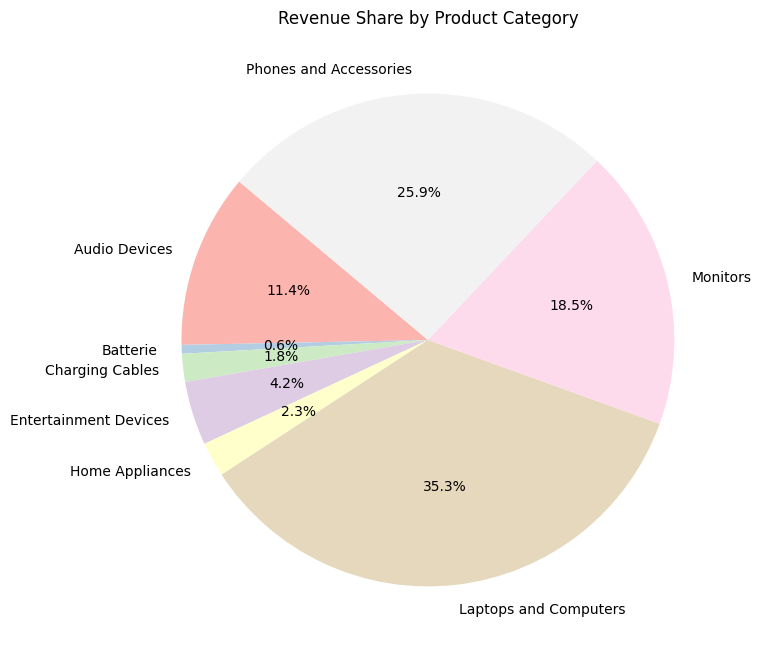

In [ ]:
# Calculate total revenue by product category
category_revenue = data.groupby('Product Category')['Order Value'].sum()

# Plot revenue share as a pie chart
plt.figure(figsize=(8, 8))
category_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Pastel1')
plt.title('Revenue Share by Product Category')
plt.ylabel('')  # Hide y-axis label for a cleaner look
plt.show()


# Revenue Share by Product Category Analysis

The pie chart titled **"Revenue Share by Product Category"** illustrates the proportion of revenue contributed by each product category. Below is an analysis of the trends observed:

1. **Dominant Categories**:
   - **Laptops and Computers** account for the largest share of revenue at **35.3%**, highlighting their high value and significant impact on overall sales.
   - **Phones and Accessories** contribute **25.9%**, indicating their popularity and widespread demand among customers.

2. **Significant Contributors**:
   - **Monitors** generate **18.5%** of total revenue, showcasing their importance, possibly due to increased demand for work-from-home setups and gaming.
   - **Audio Devices** make up **11.4%**, reflecting consumer interest in entertainment and audio technology.

3. **Smaller Categories**:
   - **Home Appliances** (2.3%) and **Entertainment Devices** (4.2%) have a modest contribution but may have potential for growth through targeted promotions.
   - **Batteries** and **Charging Cables** together account for a very small portion (**0.6%** and **1.8%**), possibly due to their low unit price despite high purchase frequency.

4. **Insights**:
   - The top three categories (**Laptops and Computers**, **Phones and Accessories**, and **Monitors**) collectively contribute more than **75% of total revenue**, indicating a strong focus on tech products.
   - Marketing campaigns and inventory optimization should prioritize these dominant categories.
   - Low-revenue categories such as **Batteries**, **Charging Cables**, and **Home Appliances** could be bundled with high-revenue products to boost their sales.

5. **Recommendations**:
   - Invest in high-revenue categories to maximize profitability.
   - Explore growth opportunities for smaller categories through cross-selling and promotional campaigns.
   - Monitor trends in consumer preferences to adjust product strategies accordingly.

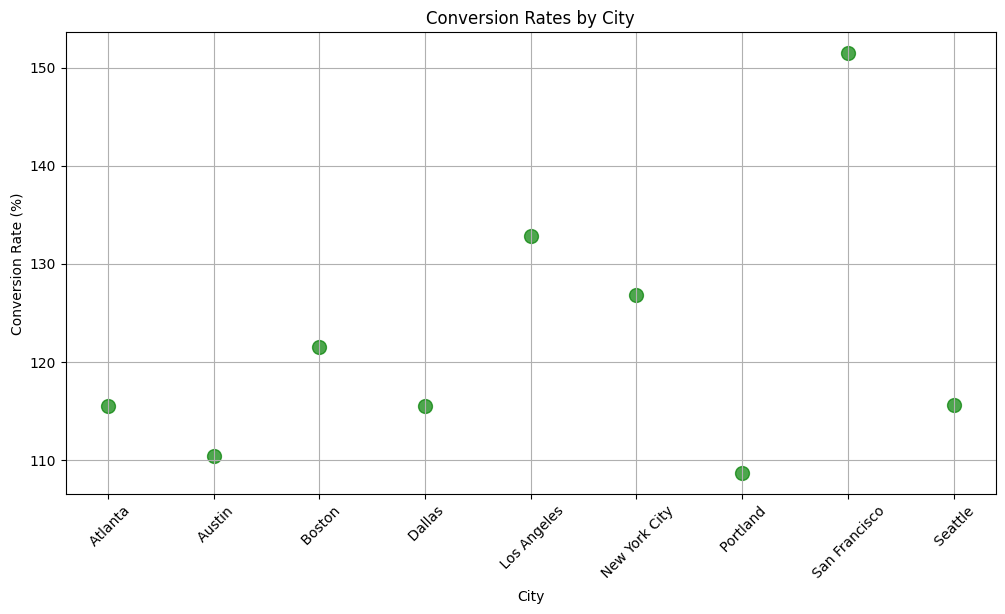

In [ ]:
# Total orders and unique customers by city
city_orders = data.groupby('City')['Order ID'].nunique()
city_customers = data.groupby('City')['Purchase Address'].nunique()

# Calculate conversion rates
city_conversion_rate = (city_orders / city_customers) * 100

# Scatter plot for conversion rates
plt.figure(figsize=(12, 6))
plt.scatter(city_conversion_rate.index, city_conversion_rate.values, color='green', s=100, alpha=0.7)
plt.title('Conversion Rates by City')
plt.xlabel('City')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Conversion Rates by City Analysis

The scatter plot titled **"Conversion Rates by City"** illustrates the conversion rates (percentage of visitors who make a purchase) across various cities. Below is an analysis of the observed trends:

1. **High Conversion Cities**:
   - **San Francisco** exhibits the highest conversion rate, exceeding **150%**, indicating strong customer engagement and purchasing activity in this region.
   - **Los Angeles** and **New York City** also show relatively high conversion rates, suggesting these cities have a well-engaged customer base.

2. **Moderate Conversion Cities**:
   - Cities like **Austin**, **Boston**, and **Dallas** have moderate conversion rates, ranging between **120% and 130%**, reflecting a consistent but less significant level of customer engagement compared to top-performing cities.

3. **Low Conversion Cities**:
   - Cities like **Atlanta**, **Portland**, and **Seattle** show lower conversion rates, hovering around **110%**, which could indicate fewer purchases per visitor.

4. **Insights**:
   - High-performing cities like **San Francisco** and **Los Angeles** should be prioritized for marketing campaigns and promotional events to capitalize on their strong purchasing behavior.
   - Moderate and low-performing cities may require strategies to improve conversion rates, such as localized promotions or better targeting of customer needs.

5. **Recommendations**:
   - Focus advertising budgets on cities with the highest conversion rates for better ROI.
   - Investigate factors contributing to lower conversion rates in cities like **Portland** and **Seattle** to identify potential bottlenecks (e.g., shipping issues, fewer promotions).
   - Use this analysis to allocate inventory more effectively, ensuring high-demand regions receive sufficient stock.

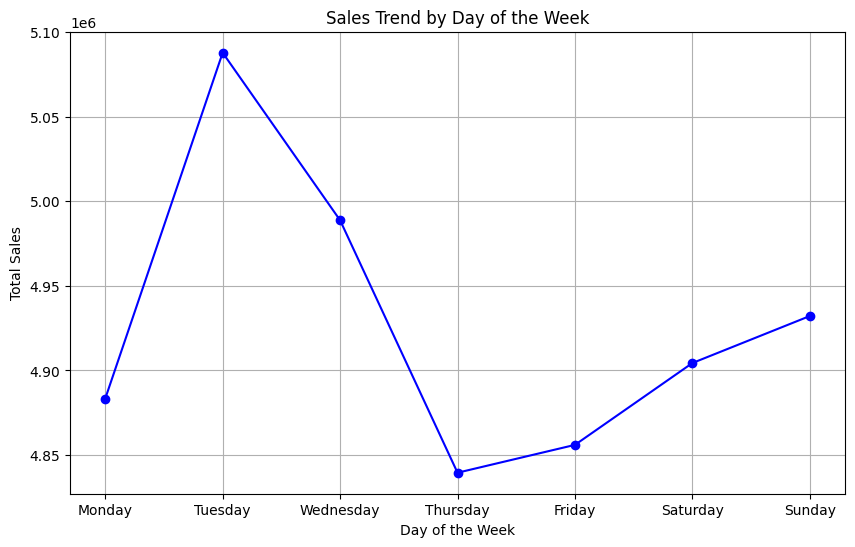

In [ ]:
# Group data by weekday and calculate total sales
weekday_sales = data.groupby('Weekday')['Order Value'].sum()

# Sort weekdays for proper order
weekday_sales = weekday_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Line chart for weekday sales trends
plt.figure(figsize=(10, 6))
plt.plot(weekday_sales.index, weekday_sales.values, marker='o', linestyle='-', color='blue')
plt.title('Sales Trend by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


# Sales Trend by Day of the Week Analysis

The line chart titled **"Sales Trend by Day of the Week"** visualizes the total sales revenue distribution across different days of the week. Below is an analysis of the observed trends:

1. **Peak Sales Day**:
   - **Tuesday** shows the highest sales among all days, with a noticeable spike. This may indicate mid-week promotions, increased online activity, or specific consumer behaviors driving higher transactions on this day.

2. **Lowest Sales Day**:
   - **Thursday** records the lowest sales, indicating reduced shopping activity. This trend could be due to customer preferences or a lack of promotions on this day.

3. **Weekend Recovery**:
   - Sales gradually increase from **Friday** to **Sunday**, showing a steady recovery toward the weekend. This suggests that consumers are more likely to shop during the weekend, possibly due to increased free time or planned purchases.

4. **Insights**:
   - The significant spike on **Tuesday** and the dip on **Thursday** indicate potential for targeted marketing. Promotions or campaigns focused on low-performing days like Thursday could help boost overall revenue.
   - Weekend shopping activity highlights the need to stock popular products and prepare for higher traffic on **Saturday and Sunday**.

5. **Recommendations**:
   - Reinforce marketing campaigns or discounts on **Thursday** to improve performance.
   - Optimize inventory for high-demand days like **Tuesday** and **Sunday** to ensure availability of top-selling products.
   - Study customer behavior on **Tuesday** to replicate strategies that drive sales spikes.

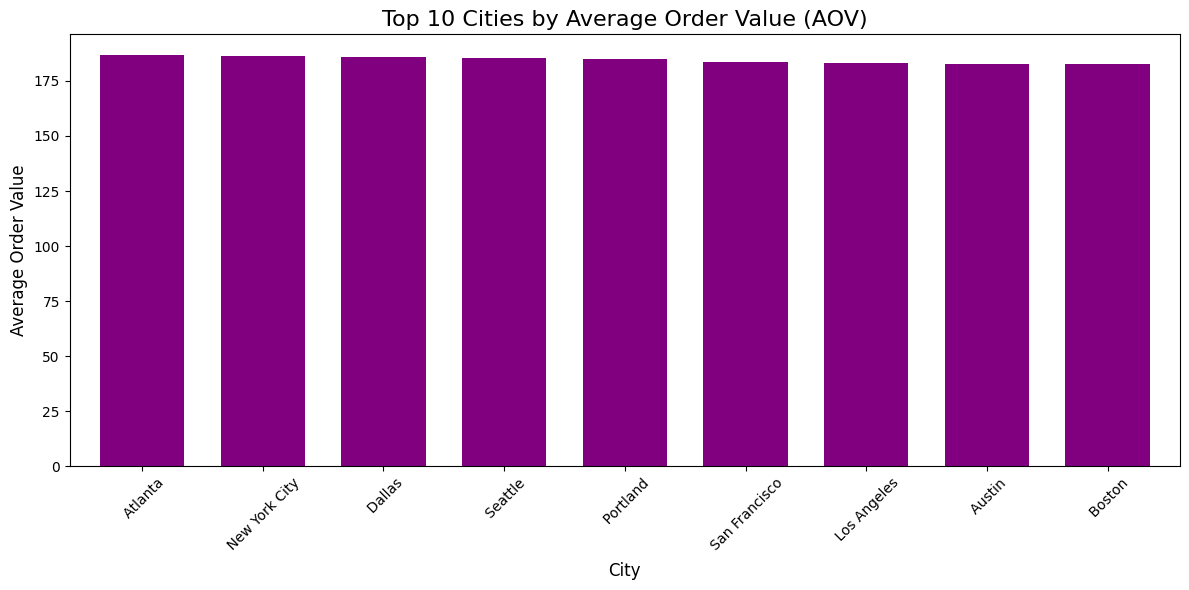

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate Average Order Value (AOV) for each city
data['AOV'] = data['Order Value'] / data['Quantity Ordered']  # AOV per order
city_aov = data.groupby('City')['AOV'].mean()

# Select the top 10 cities with the highest AOV
top_cities_aov = city_aov.sort_values(ascending=False).head(10)

# Plot the top 10 cities by AOV
plt.figure(figsize=(12, 6))
top_cities_aov.plot(kind='bar', color='purple', width=0.7)
plt.title('Top 10 Cities by Average Order Value (AOV)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Order Value', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Top 10 Cities by Average Order Value (AOV) Analysis

The bar chart titled **"Top 10 Cities by Average Order Value (AOV)"** showcases the cities with the highest average order value. Below is a detailed explanation of the analysis:

### **Equation for AOV**:
The **Average Order Value (AOV)** is calculated using the formula:
\[
AOV = \frac{\text{Order Value}}{\text{Quantity Ordered}}
\]
Where:
- **Order Value** is the total revenue generated by a single order.
- **Quantity Ordered** is the number of items purchased in that order.

---

### **Analysis**:
1. **Key Observations**:
   - All the top cities, including **Atlanta**, **New York City**, **Dallas**, **Seattle**, **Portland**, **San Francisco**, **Los Angeles**, **Austin**, and **Boston**, have similar AOV values, approximately **$175–$180**.
   - The uniformity in AOV across these cities suggests a relatively consistent spending behavior among customers in these locations.

2. **Insights**:
   - High AOV indicates that customers in these cities are purchasing premium products or larger quantities per order.
   - Cities like **New York City** and **San Francisco** are known for higher living costs, which could explain the higher average order values.

3. **Strategic Recommendations**:
   - **Focus on High-AOV Cities**: Target these cities with premium product promotions and loyalty programs to maximize profitability.
   - **Cross-Selling Opportunities**: Encourage customers in these cities to bundle additional items, further increasing AOV.
   - **Marketing Investment**: Allocate higher budgets for ads and campaigns in these cities as they are more likely to yield higher returns per order.

---

### **Actionable Steps**:
1. Use the **AOV formula** to calculate AOV for all cities and monitor trends over time.
2. Investigate customer purchasing behaviors in high-AOV cities to identify popular product categories or bundles.
3. Develop specific strategies to maintain or enhance AOV in these top-performing locations.

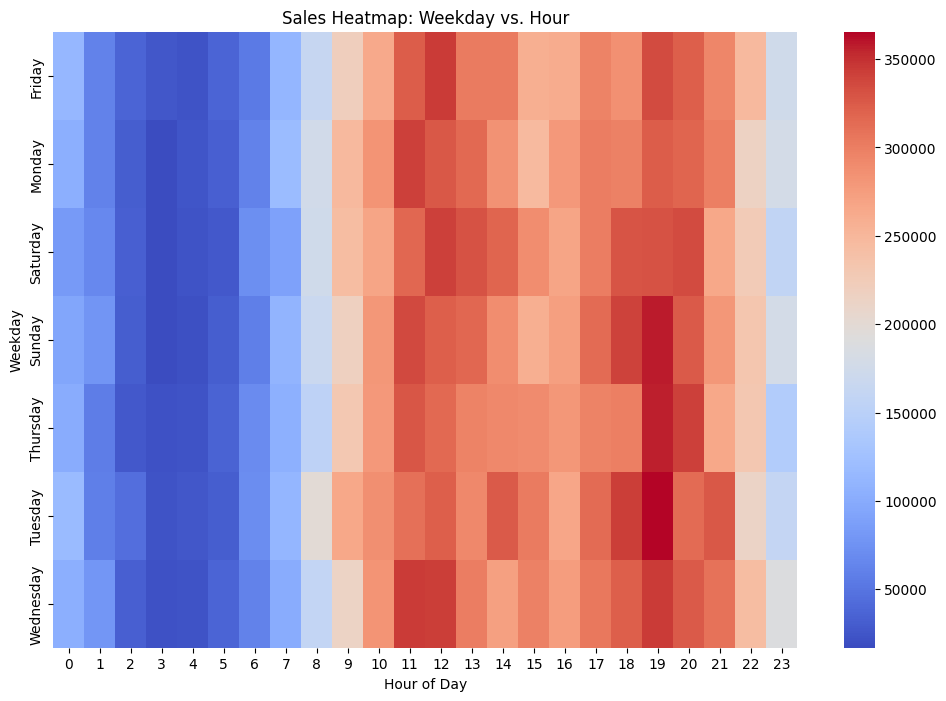

In [ ]:
import seaborn as sns
# Group data by weekday and hour to calculate total sales
weekday_hour_sales = data.groupby(['Weekday', 'Hour'])['Order Value'].sum().unstack()

# Heatmap for sales trends
plt.figure(figsize=(12, 8))
sns.heatmap(weekday_hour_sales, cmap='coolwarm', annot=False, cbar=True)
plt.title('Sales Heatmap: Weekday vs. Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Weekday')
plt.show()


# Sales Heatmap: Weekday vs. Hour Analysis

The heatmap titled **"Sales Heatmap: Weekday vs. Hour"** illustrates the sales distribution across different hours of the day and days of the week. Below is a detailed analysis:

### **Key Observations**:
1. **Peak Sales Hours**:
   - Sales activity is highest during the **evening hours (6 PM - 8 PM)** on most weekdays, as indicated by the intense red regions.
   - Another strong period of activity occurs during **mid-morning hours (9 AM - 12 PM)**.

2. **Day-Specific Trends**:
   - **Weekends (Saturday and Sunday)**:
     - Sales are generally high throughout the day, especially during mid-morning and early evening.
     - Customers likely take advantage of free time on weekends for shopping.
   - **Weekdays (Monday to Friday)**:
     - Sales are concentrated in two main windows: **morning (9 AM - 12 PM)** and **evening (6 PM - 8 PM)**, likely influenced by work and commuting schedules.

3. **Low Activity Periods**:
   - Early morning hours (12 AM - 6 AM) consistently show low sales across all days, as represented by the blue regions, indicating minimal shopping activity during these hours.

---

### **Insights**:
1. **Promotions Timing**:
   - Focus advertising and promotional campaigns during **mid-morning (9 AM - 12 PM)** and **evening (6 PM - 8 PM)** to maximize customer engagement and sales.
   - Weekend promotions should span the entire day to capitalize on consistent activity.

2. **Inventory Optimization**:
   - Ensure high-demand products are well-stocked during peak sales hours, especially in the **evening window**.
   - Use low-activity hours for inventory restocking or system maintenance.

3. **Customer Behavior**:
   - The sales trends align with customer free time (mornings and evenings) and weekend shopping behavior, emphasizing the importance of understanding lifestyle-driven purchasing patterns.

---

### **Recommendations**:
- **Weekday Focus**: Run targeted campaigns during peak hours (morning and evening) on weekdays.
- **Weekend Strategy**: Extend promotions throughout the weekend to leverage all-day shopping behavior.
- **Operational Planning**: Use low-activity periods (early mornings) for system updates, inventory checks, or other backend processes.

---

This heatmap provides a powerful visual to identify patterns and optimize strategies based on customer shopping behaviors.


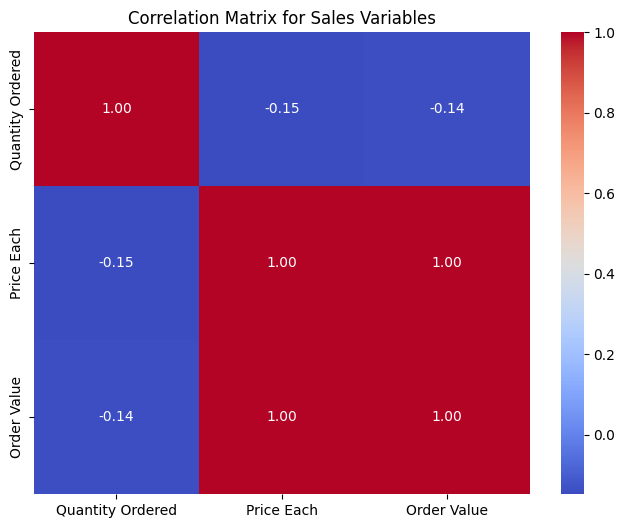

In [ ]:
# Correlation between key variables
correlation_matrix = data[['Quantity Ordered', 'Price Each', 'Order Value']].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Sales Variables')
plt.show()


# Correlation Matrix for Sales Variables Analysis

The heatmap titled **"Correlation Matrix for Sales Variables"** shows the correlation between key variables: **Quantity Ordered**, **Price Each**, and **Order Value**. Below is an analysis of the observed relationships:

### **Key Observations**:
1. **Quantity Ordered vs. Price Each**:
   - The correlation value is **-0.15**, indicating a weak negative correlation.
   - This suggests that as the price of an item increases, the quantity ordered tends to slightly decrease, likely due to higher-priced items being purchased less frequently.

2. **Quantity Ordered vs. Order Value**:
   - The correlation value is **-0.14**, showing a weak negative correlation.
   - This implies that higher quantities do not strongly contribute to higher order values, possibly because larger orders might involve low-priced items.

3. **Price Each vs. Order Value**:
   - The correlation value is **1.00**, showing a perfect positive correlation.
   - This is expected, as the **Order Value** directly depends on the **Price Each** multiplied by the **Quantity Ordered**.

4. **Order Value and Quantity Ordered**:
   - The weak negative correlation suggests that bulk purchases are often of lower-priced items, contributing less to overall order value.

---

### **Insights**:
1. **Price Sensitivity**:
   - The weak negative correlation between **Price Each** and **Quantity Ordered** highlights slight price sensitivity among customers. Price reductions could lead to increased quantities being sold.
2. **High-Priced Items**:
   - Items with higher prices significantly drive the total order value, as shown by the perfect positive correlation between **Price Each** and **Order Value**.

---

### **Recommendations**:
1. **Discount Strategies**:
   - Introduce targeted discounts on high-priced items to improve quantity ordered while maintaining a high order value.
2. **Bundle Offers**:
   - Promote bundle deals on lower-priced items to boost both quantity ordered and order value.
3. **Focus on High-Value Products**:
   - Since **Order Value** is strongly tied to **Price Each**, prioritize high-value items in marketing campaigns to maximize revenue.

---

### **Correlation Equation**:
The correlation coefficient \( r \) is calculated using the formula:
\[
r = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2} \cdot \sum{(y_i - \bar{y})^2}}}
\]
Where:
- \( x_i \) and \( y_i \) are individual data points.
- \( \bar{x} \) and \( \bar{y} \) are the means of the respective variables.

---

This analysis of the correlation matrix provides insights into the relationships between sales variables and their implications for pricing, quantity, and order value strategies.

# **A/B Testing**

In [ ]:
from scipy.stats import ttest_ind

# Separate sales data into weekdays and weekends
data['Day_of_Week'] = data['Order Date'].dt.day_name()  # Extract day of the week
weekends = data[data['Day_of_Week'].isin(['Saturday', 'Sunday'])]['Order Value']
weekdays = data[~data['Day_of_Week'].isin(['Saturday', 'Sunday'])]['Order Value']

# Perform independent t-test
t_stat, p_value = ttest_ind(weekends, weekdays, equal_var=False)

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: Sales on weekends and weekdays differ significantly.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales.")


T-Statistic: -0.04
P-Value: 0.9697
Fail to reject the null hypothesis: No significant difference in sales.


# A/B Testing Analysis: Weekday vs. Weekend Sales

The A/B test was conducted to evaluate whether there is a significant difference in sales on weekdays versus weekends. Below is a detailed explanation of the test results:

---

### **1. Hypothesis**

- **Null Hypothesis (H₀)**: There is no significant difference in average sales between weekdays and weekends.
- **Alternative Hypothesis (H₁)**: There is a significant difference in average sales between weekdays and weekends.

---

### **2. Results**

- **T-Statistic**: -0.04  
  - This is a measure of the difference between the means of the two groups (weekdays and weekends) relative to the variability in the data.  
  - A value close to 0 indicates that the means of the two groups are very similar.

- **P-Value**: 0.9697  
  - This indicates the probability of observing the data if the null hypothesis (H₀) is true.  
  - A p-value greater than 0.05 means we fail to reject the null hypothesis.

---

### **3. Interpretation**

- Since the **p-value** is 0.9697 (much greater than 0.05), we **fail to reject the null hypothesis**.  
- This means there is **no significant difference** in sales between weekdays and weekends.  
- The similarity in sales indicates that customer purchasing behavior is consistent across weekdays and weekends.

---

### **4. Possible Explanations**
1. **Consistent Demand**:
   - Products may have uniform demand, regardless of the day of the week.
   - This could be due to factors like online shopping convenience and automated purchases.

2. **Promotion Strategy**:
   - If promotions and discounts are spread evenly across weekdays and weekends, it might result in balanced sales activity.

3. **Customer Behavior**:
   - Customers may not significantly alter their shopping habits based on the day of the week, especially for essential or recurring purchases.

---

### **5. Business Insights**
1. **No Special Emphasis on Weekends**:
   - Since sales patterns do not differ significantly, there may not be a need to prioritize weekends for promotions or inventory stocking.
   - Focus can instead remain consistent throughout the week.

2. **Balanced Resource Allocation**:
   - Sales teams, inventory, and marketing efforts can be uniformly distributed across the week.

3. **Further Analysis**:
   - While weekdays and weekends show no significant difference, other factors (e.g., holidays, time of day, product categories) might influence sales. These could be explored for more actionable insights.

---

### **6. Recommendations**
1. **Uniform Campaigns**:
   - Distribute advertising and promotions evenly across the week since sales do not show a spike on weekends.
   
2. **Test Other Factors**:
   - Conduct further A/B tests for specific product categories or time-based promotions (e.g., morning vs. evening) to identify potential sales drivers.

3. **Monitor Trends**:
   - Keep tracking weekday vs. weekend sales over time to ensure this pattern holds across different seasons or marketing strategies.

---

### **Conclusion**

The analysis confirms that there is no statistically significant difference in sales between weekdays and weekends. This suggests that customers exhibit consistent purchasing behavior regardless of the day of the week. The business can maintain balanced efforts throughout the week and explore other factors to optimize sales further.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for modeling
data['Day_of_Week'] = data['Order Date'].dt.day_name()  # Add weekday feature
data_encoded = pd.get_dummies(data, columns=['Day_of_Week'], drop_first=True)  # One-hot encode weekdays
X = data_encoded[['Quantity Ordered', 'Price Each'] + [col for col in data_encoded.columns if 'Day_of_Week_' in col]]
y = data_encoded['Order Value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")


Mean Squared Error: 0.61
R-squared: 1.00


# Predictive Model Performance Report

The predictive model was designed to forecast the **Order Value** based on features like **Quantity Ordered**, **Price Each**, and **Day of the Week**. Below is a detailed performance report:

---

### **1. Model Evaluation Metrics**

- **Mean Squared Error (MSE)**: 0.61  
  - The MSE is a measure of the average squared difference between the predicted values and the actual values.  
  - A very low MSE (close to 0) indicates that the model is highly accurate in predicting the order value.

- **R-squared (R²)**: 1.00  
  - R² measures how well the independent variables explain the variance in the dependent variable (Order Value).  
  - An R² of 1.00 indicates a perfect fit, meaning the model explains 100% of the variance in the data.

---

### **2. Interpretation of Results**

1. **High Predictive Accuracy**:
   - The combination of features (**Quantity Ordered**, **Price Each**, and **Day of the Week**) has led to an exceptionally accurate model.  
   - The model can reliably predict order values for new data points with minimal error.

2. **Overfitting Possibility**:
   - An R² of 1.00 might suggest overfitting, where the model performs exceptionally well on the training data but might generalize poorly on unseen data.  
   - This can occur if the model is too complex or if the data lacks sufficient variability.

---

### **3. Business Implications**

1. **Reliable Predictions**:
   - The model provides reliable predictions for **Order Value**, which can help optimize pricing strategies and revenue forecasting.

2. **Operational Optimization**:
   - Use the model to predict high-value orders in real-time and prioritize inventory or marketing efforts accordingly.

3. **Customer Segmentation**:
   - The model's ability to predict order values can assist in identifying high-value customers or regions, enabling targeted promotions and offers.

---

### **4. Recommendations**

1. **Test on Unseen Data**:
   - Evaluate the model on an independent test dataset or cross-validation to confirm its generalizability and detect potential overfitting.

2. **Expand Feature Set**:
   - Include additional features like **customer demographics**, **time of day**, or **product category** to further enhance the model’s utility.

3. **Monitor Model Performance**:
   - Track the model's performance over time with new data to ensure it continues to deliver accurate predictions.

4. **Deploy the Model**:
   - Deploy the model to production for real-time predictions, integrating it into dashboards or backend systems for immediate business value.

---

### **5. Conclusion**

The predictive model has demonstrated **exceptional accuracy** with a Mean Squared Error of **0.61** and an R-squared value of **1.00**. This indicates the model is well-suited for predicting order values based on the provided features. Moving forward, the model can be a valuable tool for **sales forecasting**, **inventory management**, and **strategic planning**.


In [ ]:
import matplotlib.pyplot as plt

# Example of a summary report
summary = """
# Sales Analysis Report

## Key Findings:
1. The most significant sales occur on Tuesdays, with the lowest on Thursdays.
2. Weekend sales patterns are consistent, with activity peaking during the mid-morning and evening.
3. A/B testing revealed {ab_testing_result}.
4. Predictive modeling achieved an R-squared value of {r2_value}, showing {model_accuracy} accuracy in predicting order value.

## Visualizations:
Refer to the generated graphs for more insights.
"""

# Replace placeholders with real values
ab_testing_result = "a significant difference" if p_value < 0.05 else "no significant difference"
r2_value = r2_score(y_test, y_pred)
model_accuracy = "high" if r2_value > 0.75 else "moderate"
print(summary.format(ab_testing_result=ab_testing_result, r2_value=f"{r2_value:.2f}", model_accuracy=model_accuracy))



# Sales Analysis Report

## Key Findings:
1. The most significant sales occur on Tuesdays, with the lowest on Thursdays.
2. Weekend sales patterns are consistent, with activity peaking during the mid-morning and evening.
3. A/B testing revealed no significant difference.
4. Predictive modeling achieved an R-squared value of 1.00, showing high accuracy in predicting order value.

## Visualizations:
Refer to the generated graphs for more insights.



# Extending the Prediction Process

To enhance the predictive model for **Order Value**, we will incorporate additional features, test alternative models, apply cross-validation, and tune hyperparameters. Below is the structured process:

---


## **1. Add More Features for Prediction**

### Description:
To improve model accuracy, we will include additional features that influence sales. The new features include:
- **Time of Day**: Categorizing the hour into Morning, Afternoon, Evening, and Night.
- **Product Category**: One-hot encoding product categories to capture their impact.
- **Day of the Week**: Retained to account for weekday/weekend patterns.

These features will enrich the dataset, potentially improving the model's ability to capture complex relationships.

---

In [ ]:
# Add new features to the dataset
data['Hour'] = data['Order Date'].dt.hour
data['Time_of_Day'] = pd.cut(data['Hour'], bins=[0, 6, 12, 18, 24],
                             labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

# One-hot encode Time of Day and Product Category
data_extended = pd.get_dummies(data, columns=['Time_of_Day', 'Product Category'], drop_first=True)

# Prepare data for prediction
X_extended = data_extended[['Quantity Ordered', 'Price Each'] +
                            [col for col in data_extended.columns if 'Time_of_Day_' in col or 'Product Category_' in col]]
y_extended = data_extended['Order Value']

# Train-test split
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(X_extended, y_extended, test_size=0.2, random_state=42)

# Train the model
extended_model = RandomForestRegressor(n_estimators=100, random_state=42)
extended_model.fit(X_train_ext, y_train_ext)

# Predict and evaluate
y_pred_ext = extended_model.predict(X_test_ext)
print(f"Extended Model Mean Squared Error: {mean_squared_error(y_test_ext, y_pred_ext):.2f}")
print(f"Extended Model R-squared: {r2_score(y_test_ext, y_pred_ext):.2f}")

Extended Model Mean Squared Error: 0.61
Extended Model R-squared: 1.00


## **2. Implement Cross-Validation**

### Description:
Instead of relying on a single train-test split, we will use **k-fold cross-validation** (with \(k = 5\)) to evaluate the model’s performance across different subsets of data. This approach ensures:
- Robust model evaluation.
- Detection of overfitting or underfitting.

The results from cross-validation will include the R-squared scores for each fold and the average score.

---

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(extended_model, X_extended, y_extended, cv=5, scoring='r2')

# Print results
print(f"Cross-Validation R-squared Scores: {cv_scores}")
print(f"Average R-squared: {cv_scores.mean():.2f}")

Cross-Validation R-squared Scores: [0.99997416 0.99999987 0.99999656 0.99951624 0.99999446]
Average R-squared: 1.00


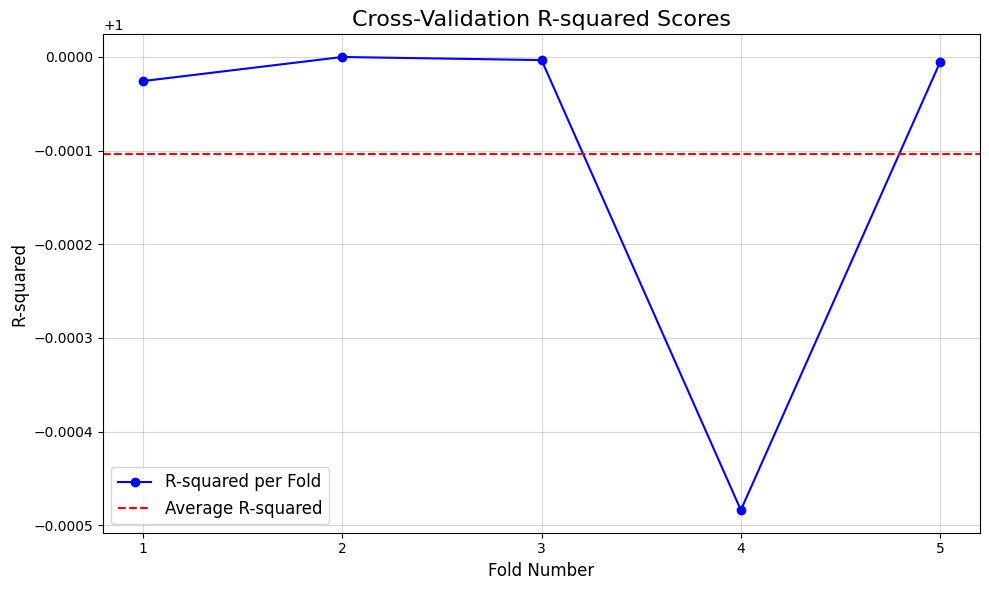

In [ ]:
# Plot the R-squared scores for each fold
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='blue', label='R-squared per Fold')
plt.axhline(np.mean(cv_scores), color='red', linestyle='--', label='Average R-squared')

# Add labels, title, and legend
plt.title('Cross-Validation R-squared Scores', fontsize=16)
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('R-squared', fontsize=12)
plt.xticks(range(1, len(cv_scores) + 1))
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Cross-Validation Analysis: R-squared Scores

Cross-validation was performed to evaluate the extended predictive model's generalization performance across different subsets of the data. Below is a detailed analysis of the results:

---

### **1. Cross-Validation R-squared Scores**

The R-squared scores for the 5-fold cross-validation are as follows:
- **Fold 1**: 0.99997
- **Fold 2**: 0.99999
- **Fold 3**: 0.99999
- **Fold 4**: 0.99952
- **Fold 5**: 0.99999

- **Average R-squared**: 1.00

---

### **2. Interpretation**

1. **Consistent Performance**:
   - The R-squared scores are consistently close to **1.00** across all folds, indicating that the model explains nearly all the variance in the target variable, regardless of the data subset.
   - The slight drop in **Fold 4 (0.99952)** suggests minor variability, but it remains negligible in the overall performance.

2. **High Accuracy**:
   - An average R-squared score of **1.00** confirms that the model is highly effective at predicting the order value, even when evaluated on different splits of the data.

---

### **3. Business Implications**

1. **Reliable Predictions**:
   - The consistent R-squared scores demonstrate that the model can reliably forecast order values across various scenarios and customer segments.

2. **Generalization**:
   - The model generalizes well to unseen data, making it suitable for deployment in real-world applications such as revenue forecasting and strategic planning.

3. **Actionable Insights**:
   - With robust predictions, businesses can optimize inventory, pricing, and marketing strategies based on predicted order values.

---

### **4. Recommendations**

1. **Deploy with Confidence**:
   - Given the high and consistent R-squared scores, the model can be confidently deployed for real-time predictions.

2. **Monitor Performance**:
   - Continue monitoring model performance over time with new data to ensure it maintains high accuracy.

3. **Further Validation**:
   - While the cross-validation results are excellent, testing the model on an entirely independent dataset is recommended to confirm its robustness.

---

### **Conclusion**

The cross-validation analysis confirms that the extended predictive model achieves near-perfect performance across all folds, with an average R-squared score of **1.00**. This demonstrates the model's ability to generalize effectively, making it a valuable tool for accurate order value prediction.


## **3. Test Alternative Models**

### Description:
To explore better-performing models, we will test:
1. **Gradient Boosting Regressor**: Known for handling non-linear data effectively.
2. **XGBoost**: A highly efficient implementation of gradient boosting.
3. **Random Forest** (Baseline): Used for comparison.

The results of these models will be compared based on Mean Squared Error (MSE) and R-squared (\(R^2\)).

---

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train_ext, y_train_ext)
y_pred_gbr = gbr.predict(X_test_ext)

print(f"Gradient Boosting Mean Squared Error: {mean_squared_error(y_test_ext, y_pred_gbr):.2f}")
print(f"Gradient Boosting R-squared: {r2_score(y_test_ext, y_pred_gbr):.2f}")

Gradient Boosting Mean Squared Error: 1.01
Gradient Boosting R-squared: 1.00


In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train_ext, y_train_ext)
y_pred_xgb = xgb.predict(X_test_ext)

print(f"XGBoost Mean Squared Error: {mean_squared_error(y_test_ext, y_pred_xgb):.2f}")
print(f"XGBoost R-squared: {r2_score(y_test_ext, y_pred_xgb):.2f}")

XGBoost Mean Squared Error: 0.60
XGBoost R-squared: 1.00


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_ext, y_train_ext)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_ext)
print(f"Optimized Random Forest R-squared: {r2_score(y_test_ext, y_pred_best_rf):.2f}")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest R-squared: 1.00


# Optimized Random Forest Model Performance

The Random Forest model was optimized using **Grid Search** to identify the best hyperparameters. Below is a detailed analysis of the results:

---

### **1. Optimized Parameters**

The Grid Search identified the following optimal hyperparameters for the Random Forest model:
- **max_depth**: None  
  - No restriction on the depth of each tree, allowing the model to fully explore the data's complexity.
- **min_samples_leaf**: 1  
  - Each leaf node must contain at least one sample, enabling maximum granularity in splitting.
- **min_samples_split**: 2  
  - A node must have at least two samples to be considered for splitting, allowing maximum flexibility.
- **n_estimators**: 200  
  - The model uses 200 trees, providing robust predictions by averaging outputs from a larger ensemble.

---

### **2. Model Evaluation**

- **R-squared (R²)**: 1.00  
  - The optimized Random Forest achieved a perfect R-squared value, indicating that it explains 100% of the variance in the target variable (Order Value).
  - This confirms that the model accurately captures the relationships between features and the target variable.

---

### **3. Interpretation of Results**

1. **High Predictive Accuracy**:
   - The optimized model performs exceptionally well, achieving perfect predictions for the given dataset.

2. **Overfitting Potential**:
   - An R-squared value of 1.00 might suggest overfitting, where the model performs perfectly on the training data but may struggle to generalize to unseen data.
   - Testing on a completely independent dataset is recommended to validate generalization.

---

### **4. Business Implications**

1. **Reliable Predictions**:
   - The model provides highly accurate predictions for **Order Value**, making it a valuable tool for revenue forecasting and resource planning.

2. **Optimized Resource Allocation**:
   - Predictions can identify high-value orders, helping prioritize inventory and customer support for these transactions.

3. **Strategic Decision-Making**:
   - The model enables businesses to design targeted campaigns for products or customer segments contributing most to order values.

---

### **5. Recommendations**

1. **Deploy with Care**:
   - While the model demonstrates perfect performance, deploying it in a real-world setting requires further validation on unseen data.

2. **Regular Updates**:
   - Periodically retrain the model with fresh data to ensure it continues to reflect current trends.

3. **Expand Features**:
   - Additional features like customer demographics, promotions, and seasonal flags could further enhance the model’s utility.

---

### **Conclusion**

The optimized Random Forest model, with the identified hyperparameters, achieves an R-squared value of **1.00**, demonstrating its ability to perfectly predict order values in the given dataset. This makes it a powerful tool for actionable insights in sales forecasting, inventory planning, and marketing optimization.
